# Content

1. Content
2. Introduksi
3. Tujuan
4. Tahapan
5. Faktor mempengaruhi penjualan mobil
  5.1 Pra-pemrosesan
    5.1.1 Memuat Data
    5.1.2 Eksplor data awal
    5.1.3 Kesimpulan awal dan langkah selanjutnya
  5.2 Mengatasi nilai hilang
  5.3 Memperbaiki tipe data
  5.4 Memperbaiki kualitas data
  5.5 Memeriksa data bersih 
  5.6 Mempelajari parameter inti
  5.7 Mempelajari dan menangani outlier
  5.8 Memperlajari parameter inti tanpa outlier
  5.9 Masa berlaku iklan
  5.10 Harga rata-rata setiap jenis kendaraan
6. Faktor Harga
7. Kesimpulan

# Introduksi

Dalam project ini ditugaskan menganalisa ribuan iklan kendaraan gratis yang ditayangkan di situs web perusahaan setiap harinya. Sebagai analis, tujuan seorang analis ialah untuk mengetahui faktor apa saja yang memiliki pengaruh terhadap harga suatu mobil

# Tujuan

Adapun tujuan dari project ini ialah
1. mengetahui faktor apa saja yang mempengaruhi harga jual beli 
2. mengetahui masa berlaku iklan paling cepat 
3. mengetahui masa berlaku iklan paling lama 
4. mengetahui 2 model mobil dengan iklan terbanyak 

# Tahapan

Tahapan yang dilakukan dalam project ini meliputi
1. Pra-pemrosesan data 
2. Identifikasi nilai hilang 
3. Memperbaiki nilai hilang 
4. Memperbaiki tipe data 
5. Memperbaiki kualitas data 
6. Identifikasi sebaran data dari parameter analisis yang akan digunakan 
7. Identifikasi outlier dari parameter analisis yang akan digunakan 
8. Memperbaiki datasets baru tanpa outlier 
9. Identifikasi sebaran datasets baru 
10. Identifikasi ketergantungan parameter analisis dengan harga
11. Mengambil kesimpulan

# **Faktor apakah yang menjual sebuah mobil?**
Kamu adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Nah, kamu ditugaskan untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Pra-pemrosesan

In [313]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Memuat Data

In [314]:
# Muat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')


### Mengeksplorasi Data Awal

Dataset yang kamu miliki berisi kolom-kolom berikut:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)- `date_posted` — tanggal iklan ditayangkan- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus
[Pahami kolom-kolomnya, lakukan eksplorasi data agar kamu terbiasa dengan data yang kamu miliki.]

In [315]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [316]:
# tampilkan sampel data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [317]:
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


berdasarkan informasi umum dan sampel data yang perlu dilakukan penyelidikan ialah kolom yang memiliki nilai hilang

berdasarkan sampel data tidak ditemukan kolom dengan tipe data yang tidak sesuai 

In [318]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

berdasarkan sampel data dapat dilihat bahwa pada beberap kolom dari data memiliki nilai hilang. Kolom yang memiliki nilai hilang ialah model year, cylinders, odometer,paint_color, dan is_4wd
kolom yang memiliki data hilang paling besar ialah kolom is_4wd yakni lebih dari 25 ribu data yang mempunyai nilai hilang

### Kesimpulan dan Langkah-Langkah Selanjutnya

data tidak terlihat normal, walaupun secara kolom harga tidak ada nilai yang hilang tetapi dalam mengambil keputusan nilai harga jual mobil bekassangat bergantung pada tahun keluaran mobil, silinder mobil, jarak tempuh kendaraan, dan is_4wd. Sedangkan untuk wanra kendaran tidak terlalu mempengaruhi keputusan seseorang dalam mempertimbangakan membeli mobil bekas.
langkah selanjutnya yang akan dilakukan adalah 
-menilai faktor penyebab nilai hilang --> kolom model year, cylinders, odometer, paint color, is_4wd
-subtitusi nilai hilang --> apakah dapat diganti dengan mean atau median dari data bergantung pada hasil describe
-Mengevaluasi dan memodifikasi struktur data sesuai dengan kubutuhan --> dilakuan dengan menggunakan pivot table, 
-memperbaiki kualitas data --> memodikasi data agar lebih memudahkan pengguna dalam membaca data seperti mengubah bentuk penulisan waktu, menambhakan hari pada tanggal tayang
-identifikasi apakah pada kolom terdapat outlier atau tidak --> menggunakan sebaran boxplot

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

In [319]:
df[df['model_year'].isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
144,8995,NaN,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0,2019-03-18,27


In [320]:
miss_value_model_year = df['model_year'].isna().sum() / 51525
f'Persentase nilai hilang model_year {miss_value_model_year:.3%}'

'Persentase nilai hilang model_year 7.024%'

In [321]:
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

berdasarkan data hilang pada kolom model_year, faktor yang berkontribusi dalam hilangnya nilai pada kolom ini adalah pemilik data atau pemilik mobil tidak mengetahui tahun keluaran mobil atau lupa memasukan data tahun keluaran mobil karena data berjumlah sangat besar.
berdasarkan hasil sebaran data nilai hilang pada kolom model_year akan diganti dengan mean dari kolom tersebut
pertanyaan: distribusi outlier terlihat mencurigakan karena nilai min sangat jauh dengan nilai q1

In [322]:
median_mod_year = df['model_year'].median()
median_mod_year

2011.0

In [323]:
df['model_year'] = df['model_year'].fillna(median_mod_year)

In [324]:
df['model_year'].isna().sum()

0

In [325]:
df['model_year'].shape

(51525,)

In [326]:
df[df['cylinders'].isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
72,3650,2011.0,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
75,6950,2005.0,chevrolet tahoe,excellent,NaN,gas,186021.0,automatic,SUV,NaN,1.0,2018-10-30,3
87,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52
119,14800,2016.0,kia sorento,like new,NaN,gas,NaN,automatic,SUV,brown,NaN,2019-02-27,93
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,NaN,1.0,2018-08-31,44


In [327]:
miss_cylinders = df['cylinders'].isna().sum()
miss_cylinders

5260

In [328]:
percentage_miss_cylinders = df['cylinders'].isna().sum() / 51250 
f'Persentase nilai hilang pada cylinders {percentage_miss_cylinders:.3%}'

'Persentase nilai hilang pada cylinders 10.263%'

In [329]:
df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

berdasarkan data nilai hilang di cylinders, nilai yang hilang dipengaruhi oleh pemilik lupa mengisi nilai cylinders karena pemilik data sudah memiliki basis cylinders untuk semua tipe yang dimilikinya.

berdasarakn besar nilai hilang yang lebih dari 10% maka nilai hilang akan digantikan dengan meadian kolom, tetapi dikarenakan hasil sebaran data, nilai hilang pada cylinder dapat diganti dengan nilai mean kolom.

pada kolom ini nilai yang diganti akan disesuaikan dengan model mobil bukan mean dari kolom ini.

In [330]:
cylinders_grouped = df.groupby('model')['cylinders'].value_counts()
cylinders_grouped

model              cylinders
acura tl           6.0          208
                   4.0            3
bmw x5             6.0          200
                   8.0           51
buick enclave      6.0          245
                               ... 
volkswagen jetta   5.0          123
                   6.0            4
volkswagen passat  4.0          243
                   5.0           43
                   6.0           30
Name: cylinders, Length: 307, dtype: int64

In [331]:
cylinders_grouped['toyota sienna']

cylinders
6.0    285
4.0      8
8.0      1
Name: cylinders, dtype: int64

berdasarkan data groupby ditemukan bawah dengan model mobil yang sama memiliki tipe cylinders yang berbeda, oleh karena itu nilai subtitusi dari missing value pada kolom ini akan diganti dengan median data kolom cylinders

In [332]:
median_mod_year = df['cylinders'].median()
median_mod_year

6.0

In [333]:
df['cylinders'] = df['cylinders'].fillna(median_mod_year)

In [334]:
df['cylinders'].isna().sum()

0

In [335]:
df[df['odometer'].isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
29,5495,2010.0,chevrolet impala,excellent,6.0,gas,NaN,automatic,sedan,white,NaN,2019-02-18,20
38,7999,2015.0,chrysler 200,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2019-03-08,29
41,11995,2017.0,nissan rogue,like new,4.0,gas,NaN,automatic,SUV,silver,1.0,2018-09-20,21
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
56,4200,2006.0,jeep grand cherokee,excellent,6.0,gas,NaN,automatic,SUV,white,1.0,2018-07-01,79


In [336]:
miss_odometer = df['odometer'].isna().sum()
miss_odometer

7892

In [337]:
percentage_miss_odometer = df['odometer'].isna().sum() / 51250 
f'Persentase nilai hilang pada odometer {percentage_miss_odometer:.3%}'

'Persentase nilai hilang pada odometer 15.399%'

In [338]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

berdasarkan pengolahan sementara dapat dilihat bahwa besar nilai hilang pada kolom odometer lebih dari 10% artinya nilai hilang akan digantikan dengan median
tetapi berdsaarkan sebaran data dapat dilihat bahwa nilai std kecil dari pada mean artinya nilai hilang diganti dengan mean 
untuk sementara nilai odometer akan diganti dengan median
pertanyaan: perlu melihat sebaran value pada kolom ini karena nilai min dan max sangat jauh dengan rentang quartil yang dimiliki

In [339]:
median_odo = df['odometer'].median()
median_odo

113000.0

In [340]:
df['odometer'] = df['odometer'].fillna(median_odo)

In [341]:
df['odometer'].isna().sum()

0

In [342]:
df[df['paint_color'].isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,113000.0,automatic,sedan,NaN,NaN,2018-07-26,43
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,NaN,2018-09-13,25
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,NaN,2018-06-04,121
35,14999,2015.0,dodge charger,good,6.0,gas,63037.0,automatic,sedan,NaN,NaN,2018-05-11,37
36,10499,2013.0,chrysler 300,good,6.0,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22


In [343]:
miss_paint = df['paint_color'].isna().sum()
miss_paint

9267

In [344]:
percentage_miss_paint = df['paint_color'].isna().sum() / 51250 
f'Persentase nilai hilang pada paint {percentage_miss_paint:.3%}'

'Persentase nilai hilang pada paint 18.082%'

In [345]:
df['paint_color'].describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

In [346]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

berdasarkan hasil sebaran data dapat diketahui bahwa nilai yang paling banyak diminati adalah warna putih, sehingga nilai subtitusi untuk missing value pada kolom warna diganti dengan warna terbanyak

In [347]:
df['paint_color'] = df['paint_color'].fillna('white')

In [348]:
df['paint_color'].isna().sum()

0

In [349]:
df[df['is_4wd'].isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,white,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
13,16500,2018.0,hyundai sonata,excellent,4.0,gas,22104.0,automatic,sedan,silver,NaN,2019-01-14,29
19,13990,2018.0,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,NaN,2018-08-25,27
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,white,NaN,2018-08-22,8
24,3950,2009.0,chrysler 200,excellent,4.0,gas,113000.0,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,113000.0,automatic,sedan,white,NaN,2018-07-26,43


In [350]:
miss_wd = df['is_4wd'].isna().sum()
miss_wd

25953

In [351]:
percentage_miss_wd = df['is_4wd'].isna().sum() / 51250 
f'Persentase nilai hilang pada wd {percentage_miss_wd:.3%}'

'Persentase nilai hilang pada wd 50.640%'

In [352]:
df['is_4wd'].describe()

count    25572.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: is_4wd, dtype: float64

berdasarkan hasil persentase missing value, nilai hilang pada kolom ini mencapai 50 persen sehingga nilai subtitusi missing value adalah median

berdasarkan hasil sebaran data dapat dilihat bahwa nilai mean lebih besar dari pada std sehingga berdasarkan informasi data ini maka nilai subtitusi diganti dengan nilai mean 

keputusan: nilai hilang pada kolom ini akan diganti dengan nilai median
    
alasan nilai hilang : pemilik data menganggap mana mobil yang memiliki 4 roda tercemin dari tipe mobil  

In [355]:
df['is_4wd'] =df['is_4wd'].fillna(0)

## Memperbaiki Tipe Data

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [358]:
#mengubah date_posted ke date time
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,white,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,white,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


In [360]:
#mengubah is_4wd dari float menjadi int
df['is_4wd'] = df['is_4wd'].astype('bool')

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


In [362]:
#mengubah model_year menjadi int
df['model_year'] = df['model_year'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


In [363]:
#mengubah cylinders menjadi int
df['cylinders'] = df['cylinders'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


In [364]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,white,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [365]:
df.describe()

,price,model_year,cylinders,odometer,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,2009.838234,6.112450,115162.352179,39.55476
std,10040.803015,6.065836,1.573784,59909.264385,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.00000
25%,5000.000000,2007.000000,4.000000,79181.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,33.00000
75%,16839.000000,2014.000000,8.000000,146541.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000


In [370]:
df.describe()

,price,model_year,cylinders,odometer,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,2009.838234,6.112450,115162.352179,39.55476
std,10040.803015,6.065836,1.573784,59909.264385,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.00000
25%,5000.000000,2007.000000,4.000000,79181.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,33.00000
75%,16839.000000,2014.000000,8.000000,146541.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000


## Memperbaiki Kualitas Data

In [371]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
df['days_vehi_posted'] = df['date_posted'].dt.weekday
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_vehi_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,5
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,white,False,2019-03-22,9,4
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1


In [372]:
df['month_vehi_posted'] = df['date_posted'].dt.month
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_vehi_posted,month_vehi_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,5,6
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,white,False,2019-03-22,9,4,3
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  days_vehi_posted   51525 non-null  int64         
 14  month_

In [374]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['year_posted'] = df['date_posted'].dt.year
df['age_vehi_posted'] = df['year_posted'] - df['model_year'] + 1
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_vehi_posted,month_vehi_posted,year_posted,age_vehi_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,5,6,2018,8
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,white,False,2019-03-22,9,4,3,2019,17
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3


In [375]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['avg_dist_annually'] = (df['odometer'] / df['age_vehi_posted']).round()
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_vehi_posted,month_vehi_posted,year_posted,age_vehi_posted,avg_dist_annually
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,5,6,2018,8,18125.0
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.0
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.0
3,1500,2003,ford f-150,fair,8,gas,113000.0,automatic,pickup,white,False,2019-03-22,9,4,3,2019,17,6647.0
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26968.0


In [376]:
age_max = df['age_vehi_posted'].max()
age_max

111

In [377]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang bisa dimanipulasi lebih mudah
dic_cond = {'new':5,'like new':4,'excellent':3,'good':2,'fair':1,'salvage':0}
df['condition'] = df['condition'].map(dic_cond)

In [378]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_vehi_posted,month_vehi_posted,year_posted,age_vehi_posted,avg_dist_annually
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,5,6,2018,8,18125.0
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.0
3,1500,2003,ford f-150,1,8,gas,113000.0,automatic,pickup,white,False,2019-03-22,9,4,3,2019,17,6647.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26968.0


In [379]:
df.describe(include='all')

/tmp/ipykernel_27/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_vehi_posted,month_vehi_posted,year_posted,age_vehi_posted,avg_dist_annually
count,51525.000000,51525.000000,51525,51525.000000,51525.000000,51525,51525.000000,51525,51525,51525,51525,51525,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
unique,NaN,NaN,100,NaN,NaN,5,NaN,3,13,12,2,354,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ford f-150,NaN,NaN,gas,NaN,automatic,SUV,white,False,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2796,NaN,NaN,47288,NaN,46902,12405,19296,25953,186,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,12132.464920,2009.838234,NaN,2.637535,6.112450,NaN,115162.352179,NaN,NaN,NaN,NaN,NaN,39.55476,3.005434,6.628491,2018.307462,9.469229,15537.650383
std,10040.803015,6.065836,NaN,0.712447,1.573784,NaN,59909.264385,NaN,NaN,NaN,NaN,NaN,28.20427,1.997759,3.474134,0.461447,6.079773,12341.661411
min,1.000000,1908.000000,NaN,0.000000,3.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,NaN,2.000000,4.000000,NaN,79181.000000,NaN,NaN,NaN,NaN,NaN,19.00000,1.000000,3.000000,2018.000000,5.000000,9412.000000


## Memeriksa Data yang Sudah Bersih

In [380]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,days_vehi_posted,month_vehi_posted,year_posted,age_vehi_posted,avg_dist_annually
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.838234,2.637535,6.112450,115162.352179,39.55476,3.005434,6.628491,2018.307462,9.469229,15537.650383
std,10040.803015,6.065836,0.712447,1.573784,59909.264385,28.20427,1.997759,3.474134,0.461447,6.079773,12341.661411
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,79181.000000,19.00000,1.000000,3.000000,2018.000000,5.000000,9412.000000
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,33.00000,3.000000,7.000000,2018.000000,8.000000,13214.000000
75%,16839.000000,2014.000000,3.000000,8.000000,146541.000000,53.00000,5.000000,10.000000,2019.000000,13.000000,18394.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,111.000000,373200.000000


In [381]:
# tampilkan sampel data 
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_vehi_posted,month_vehi_posted,year_posted,age_vehi_posted,avg_dist_annually
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,5,6,2018,8,18125.0
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.0
3,1500,2003,ford f-150,1,8,gas,113000.0,automatic,pickup,white,False,2019-03-22,9,4,3,2019,17,6647.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26968.0


## Mempelajari Parameter Inti 
- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

Text(0, 0.5, 'Jumlah mobil')

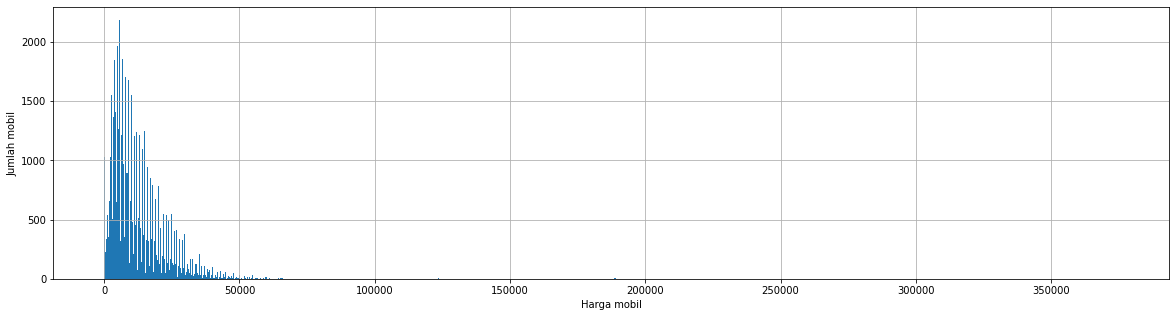

In [382]:
#histogram untuk harga
df['price'].hist(bins=1000, figsize=(20,5))
plt.xlabel('Harga mobil')
plt.ylabel('Jumlah mobil')

<AxesSubplot:>

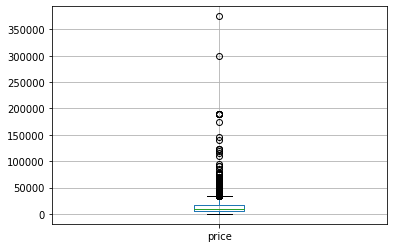

In [383]:
df.boxplot('price')

berdasarkan histogram harga dapat dilihat bahwa umumnya mobil dijual dengan harga dibawah 50 ribu. jumlah mobil yang dijual dengan harga melebihi 50 ribu sedikt serta mobil yang dijual melebihi 100 ribu tidak ada

Text(0, 0.5, 'Jumlah mobil')

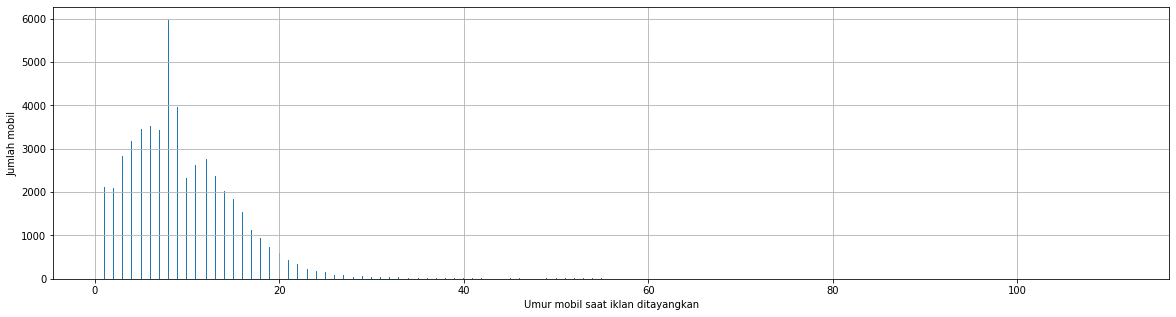

In [384]:
#histogram untuk usia kendaraan saat ditayangkan
df['age_vehi_posted'].hist(bins=1000, figsize=(20,5))
plt.xlabel('Umur mobil saat iklan ditayangkan')
plt.ylabel('Jumlah mobil')

berdasarkan hasil data histogram dapat dilihat bahwasanya umur mobil yang banyak ditemukan dalam iklan ialah mobil dengan umur dibawah 20 tahun, lebih dari ini nilainya sangat sedikit

<AxesSubplot:>

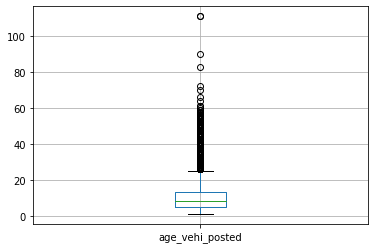

In [385]:
df.boxplot('age_vehi_posted')

Text(0, 0.5, 'Jumlah mobil')

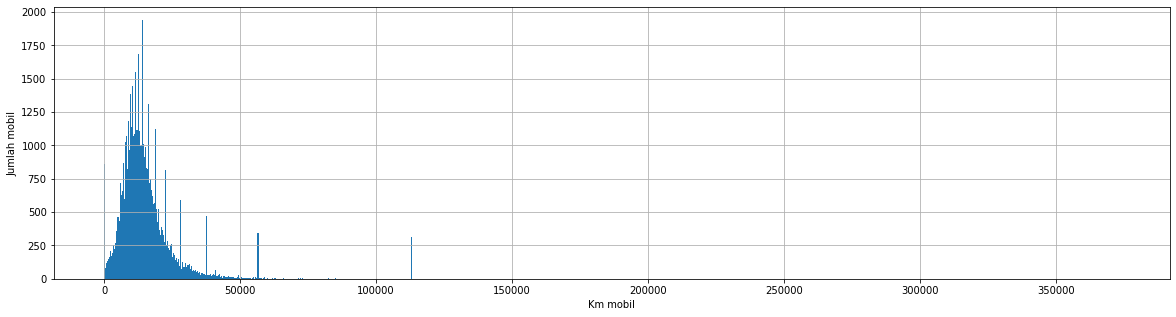

In [386]:
#histogram untuk jarak tempuh
df['avg_dist_annually'].hist(bins=1000, figsize=(20,5))
plt.xlabel('Km mobil')
plt.ylabel('Jumlah mobil')

berdasarkan data histogram dapat dilihat bahwasanya banyak mobil yang dijual memiliki rata-rata kilometer kurang dari 50 ribu.

<AxesSubplot:>

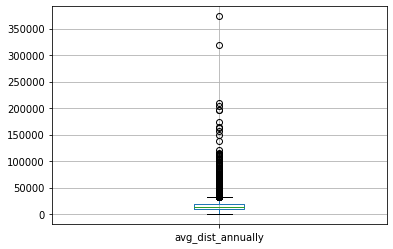

In [387]:
df.boxplot('avg_dist_annually')

Text(0, 0.5, 'Jumlah mobil')

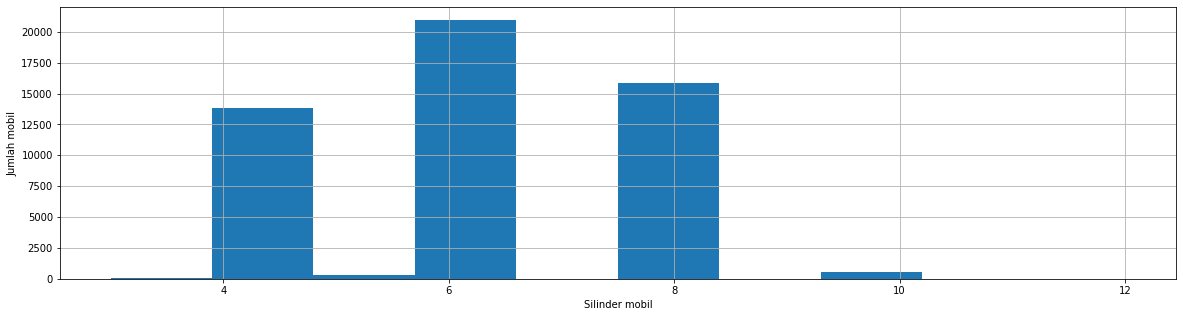

In [388]:
#histogram untuk jumlah silinder
df['cylinders'].hist(figsize=(20,5))
plt.xlabel('Silinder mobil')
plt.ylabel('Jumlah mobil')

berdasarkan histogram dapat dilihat bahwa mobil yang banyak dijumpai dalam iklan adalah mobil dengan silinder 4,6 dan 8. Jumlah mobil dengan silinder 10 berjumlah kurang dari 1ribu mobil sedangkan jumlah mobil yang memiliki silinder diluar dari yang telah disebutkan bernilai sangat sedikit maupun tidak ada.

<AxesSubplot:>

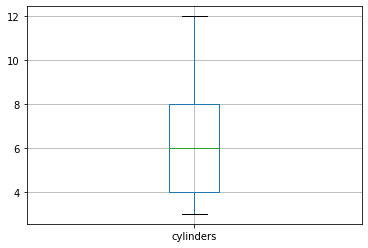

In [389]:
df.boxplot('cylinders')

Text(0, 0.5, 'Jumlah mobil')

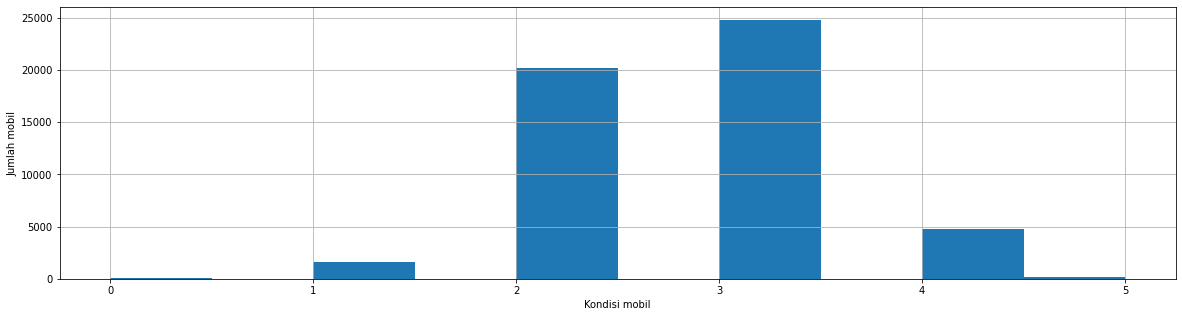

In [390]:
#histogram untuk kondisi
df['condition'].hist(figsize=(20,5))
plt.xlabel('Kondisi mobil')
plt.ylabel('Jumlah mobil')

berdasarkan histogram kondisi, mobil yang umum di pasang di iklan memiliki kondisi good dan exccellent. sedangkan mobil dengan gondisi new serta salvage jumlahnya sangat sedikit sehingga nilai tersebut dapat diabaikan

<AxesSubplot:>

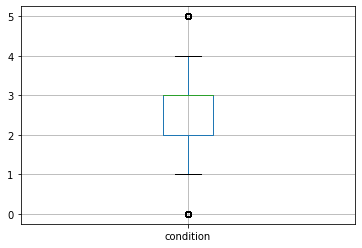

In [391]:
df.boxplot('condition')

## Mempelajari dan Menangani Outlier

In [392]:
#menentukan batas atas dan batas bawah 
def limit (data, column):
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    data = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]
    
    return data

In [393]:
df_baru = df.copy()
#menerapkan fungsi kepada kolom yang memiliki outlier
for column in ['price','age_vehi_posted','avg_dist_annually']:
    df_akhir = limit(df_baru, column)
    while len(df_akhir) != len(df_baru):
        df_baru = df_akhir.copy()
        df_akhir = limit(df_baru, column)

## Mempelajari Parameter Inti Tanpa Outlier

In [394]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44038 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              44038 non-null  int64         
 1   model_year         44038 non-null  int64         
 2   model              44038 non-null  object        
 3   condition          44038 non-null  int64         
 4   cylinders          44038 non-null  int64         
 5   fuel               44038 non-null  object        
 6   odometer           44038 non-null  float64       
 7   transmission       44038 non-null  object        
 8   type               44038 non-null  object        
 9   paint_color        44038 non-null  object        
 10  is_4wd             44038 non-null  bool          
 11  date_posted        44038 non-null  datetime64[ns]
 12  days_listed        44038 non-null  int64         
 13  days_vehi_posted   44038 non-null  int64         
 14  month_

In [395]:
df_baru.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_vehi_posted,month_vehi_posted,year_posted,age_vehi_posted,avg_dist_annually
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,5,6,2018,8,18125.0
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.0
3,1500,2003,ford f-150,1,8,gas,113000.0,automatic,pickup,white,False,2019-03-22,9,4,3,2019,17,6647.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26968.0


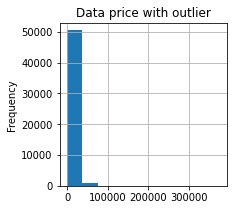

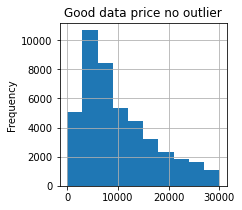

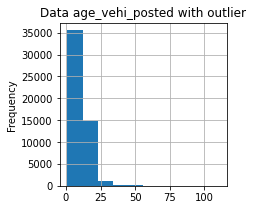

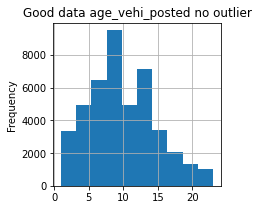

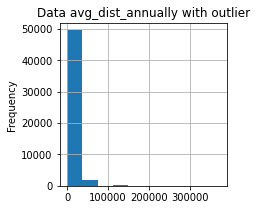

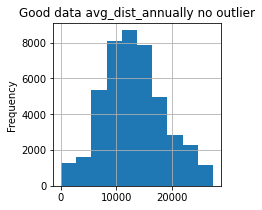

In [396]:
#membuat histogram berdasarkan data dengan outlier dan tanpa outlier
for col in ['price','age_vehi_posted','avg_dist_annually']:
    df[col].plot(kind='hist', figsize=(3,3), grid=True)
    plt.title(f"Data {col} with outlier")
    plt.show()
    df_baru[col].plot(kind='hist', figsize=(3,3), grid=True)
    plt.title(f"Good data {col} no outlier")
    plt.show()

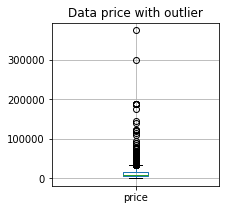

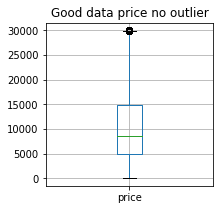

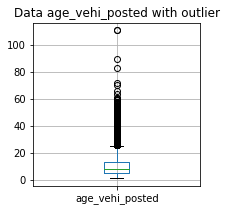

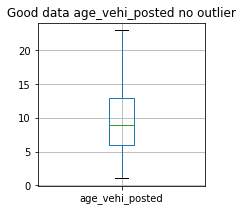

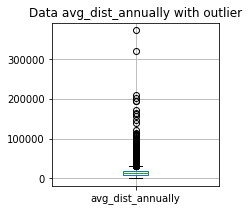

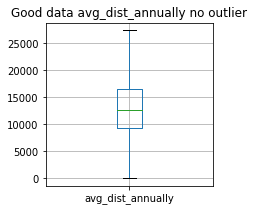

In [397]:
#membuat boxplot berdasarkan data dengan outlier dan tanpa outlier
for col in ['price','age_vehi_posted','avg_dist_annually']:
    df[col].plot(kind='box', figsize=(3,3), grid=True)
    plt.title(f"Data {col} with outlier")
    plt.show()
    df_baru[col].plot(kind='box', figsize=(3,3), grid=True)
    plt.title(f"Good data {col} no outlier")
    plt.show()

## Masa Berlaku Iklan 

In [398]:
med_days = df_baru['days_listed'].median()
mean_days = df_baru['days_listed'].mean()
print(med_days)
print(mean_days)

33.0
39.52824833098688


berdasarkan hasil median dan rata-rata iklan meyangkan jual beli mobil dapat ditentukan bahwa iklan dapat dihapus setelah 30 hari tayang sedangkan lama maksimum dari penayangan iklan ialah 40 hari 

## Harga Rata-Rata Setiap Jenis Kendaraan

In [399]:
df_baru.groupby('type').agg({'days_listed':'count', 'price':'mean'}).sort_values('days_listed',ascending=False).reset_index()

,type,days_listed,price
0,sedan,11051,6638.790698
1,SUV,11003,9767.903572
2,truck,9843,13891.550645
3,pickup,5573,13563.311861
4,coupe,1885,13075.778249
5,wagon,1450,8643.030345
6,mini-van,1058,7522.137996
7,hatchback,941,6530.224230
8,van,527,8004.569260
9,convertible,315,12834.841270


berdasarkan data grouping antara tipe mobil dengan jumlah iklan yang ditayangkan per tipe mobil dapat dilihat bahwa mobil dengan tipe SUV dan sedan merupakan tipe paling banyak ditayangkan. Selain itu berdasarkan hasil ini dapat dilihat bahwa potensi pasar untuk membeli atau sedang mencari mobil SUV dan sedan sangat tinggi.  

<AxesSubplot:xlabel='type'>

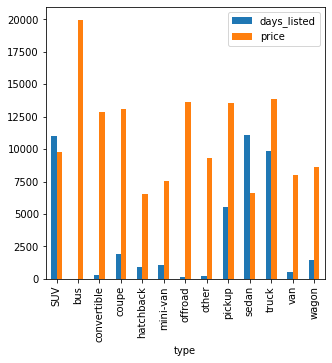

In [400]:
df_baru.groupby('type').agg({'days_listed':'count', 'price':'mean'}).plot(kind='bar',figsize=(5,5))

<div class="alert alert-danger">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

Yang diminta adalah perbandingan antara sum days_listed dan mean avg_price berdasarkan type, contoh: 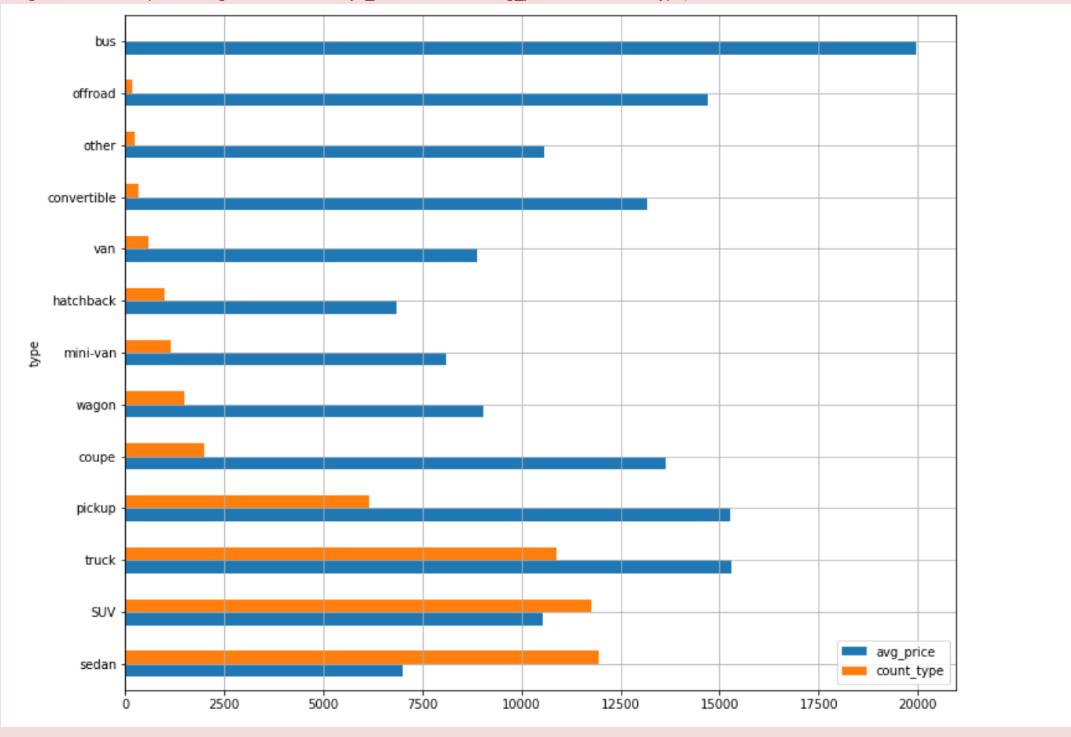</div>

# 1.11 Faktor Harga

In [401]:
df_baru.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,days_vehi_posted,month_vehi_posted,year_posted,age_vehi_posted,avg_dist_annually
price,1.000000,0.490956,0.194784,0.275936,-0.405503,0.312288,-0.004040,-0.001790,-0.021757,0.018929,-0.488929,0.104473
model_year,0.490956,1.000000,0.276203,-0.163098,-0.564851,-0.042309,-0.002657,-0.001844,-0.044646,0.045318,-0.995208,0.426288
condition,0.194784,0.276203,1.000000,-0.075717,-0.269340,-0.002920,0.001542,0.003340,-0.008488,0.011375,-0.274991,0.006583
cylinders,0.275936,-0.163098,-0.075717,1.000000,0.121164,0.384845,0.002511,-0.005843,0.004685,-0.004266,0.162622,-0.035802
odometer,-0.405503,-0.564851,-0.269340,0.121164,1.000000,0.072664,0.004303,0.005971,0.014092,-0.008951,0.563774,0.390901
is_4wd,0.312288,-0.042309,-0.002920,0.384845,0.072664,1.000000,0.001657,0.004461,0.004801,-0.004016,0.041901,0.049708
days_listed,-0.004040,-0.002657,0.001542,0.002511,0.004303,0.001657,1.000000,0.002199,-0.011671,0.010983,0.003731,-0.000986
days_vehi_posted,-0.001790,-0.001844,0.003340,-0.005843,0.005971,0.004461,0.002199,1.000000,0.006866,-0.006114,0.001245,0.002718
month_vehi_posted,-0.021757,-0.044646,-0.008488,0.004685,0.014092,0.004801,-0.011671,0.006866,1.000000,-0.821512,-0.035778,0.070635
year_posted,0.018929,0.045318,0.011375,-0.004266,-0.008951,-0.004016,0.010983,-0.006114,-0.821512,1.000000,0.052576,-0.086319


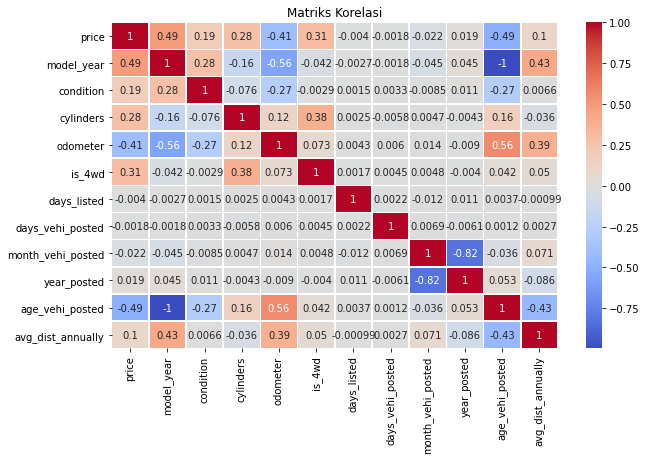

In [402]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_baru.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()

 <div class="alert alert-success">
<b>Fachri's comment v.2</b> <a class="tocSkip"></a>

Sip good job 
</div>

In [403]:
#price vs tahun mobil untuk mobil 
df_baru['price'].corr(df_baru['age_vehi_posted'])

-0.4889285615373678

<AxesSubplot:xlabel='price', ylabel='age_vehi_posted'>

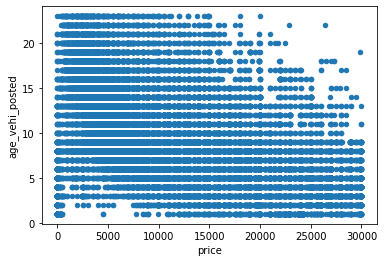

In [404]:
df_baru.plot(x='price', y='age_vehi_posted', kind='scatter')

berdasarkan hasil korelasi dapat dilihat bahwa ketergantungan antar kedua kolom ini rendah

In [405]:
#price vs rata-rata perjalanan mobil dalam seathun
df_baru['price'].corr(df_baru['avg_dist_annually'])

0.10447329080826008

<AxesSubplot:xlabel='price', ylabel='avg_dist_annually'>

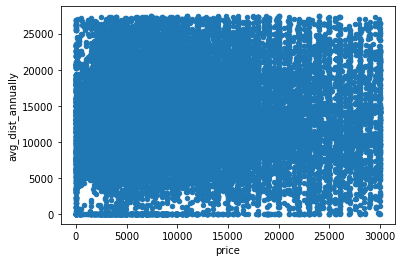

In [406]:
df_baru.plot(x='price', y='avg_dist_annually', kind='scatter')

berdasarkan hasil korelasi dapat dilihat bahwa ketergantungan antar kedua kolom ini rendah

In [407]:
df_baru['price'].corr(df_baru['condition'])

0.1947843440055613

<AxesSubplot:xlabel='price', ylabel='condition'>

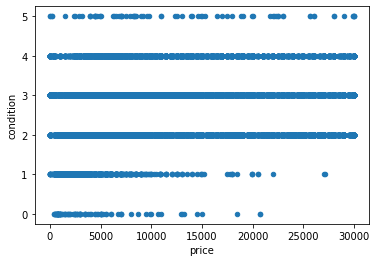

In [408]:
df_baru.plot(x='price', y='condition', kind='scatter')

berdasarkan hasil korelasi dapat dilihat bahwa ketergantungan antar kedua kolom ini rendah

In [409]:
df_baru['price'].corr(df_baru['model_year'])

0.49095608620346365

<AxesSubplot:xlabel='price', ylabel='model_year'>

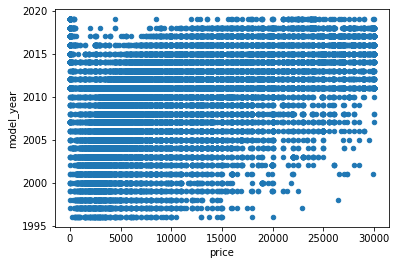

In [410]:
df_baru.plot(x='price', y='model_year', kind='scatter')

berdasarkan hasil korelasi dapat dilihat bahwa ketergantungan antar kedua kolom ini rendah

In [411]:
df_baru['price'].corr(df_baru['cylinders'])

0.2759360801101247

<AxesSubplot:xlabel='price', ylabel='cylinders'>

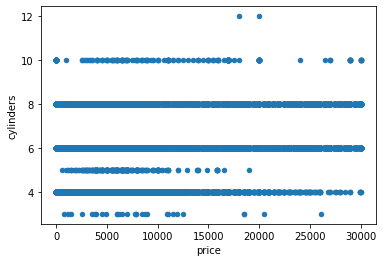

In [412]:
df_baru.plot(x='price', y='cylinders', kind='scatter')

berdasarkan hasil korelasi dapat dilihat bahwa ketergantungan antar kedua kolom ini rendah

Text(0.5, 1.0, 'price vs type')

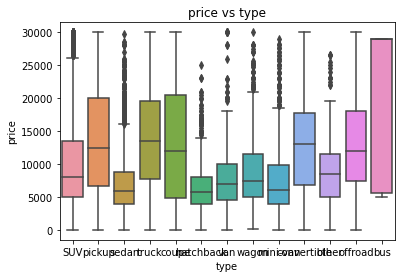

In [413]:
sns.boxplot(data=df_baru, x='type', y='price')
plt.title('price vs type')

Text(0.5, 1.0, 'price vs transmission')

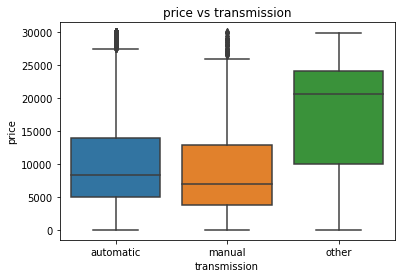

In [414]:
sns.boxplot(data=df_baru, x='transmission', y='price')
plt.title('price vs transmission')

Text(0.5, 1.0, 'price vs paint_color')

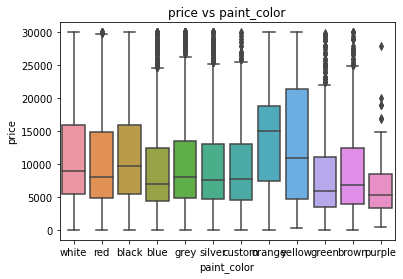

In [415]:
sns.boxplot(data=df_baru, x='paint_color', y='price')
plt.title('price vs paint_color')

## Kesimpulan Umum

dalam project ini bertujuan untuk mengetahui faktor apa saja yang mempengaruhi penjualan mobil. Faktor-faktor yang diduga akan mempengaruhi penjualan mobil ialah harga mobil, model mobil, tipe mobil, jarak tempuh mobil, warna mobil. tahun keluaran model mobil, silinder, dan transmisi mobil. 
untuk mengetahui faktor apa saja yang pada akhirnya mempengaruhi penjualan mobil perlu dilakukan beberapa langkah yaitu 
1. melakukan eksplorasi data untuk mengetahui data dan kolom apa saja yang tersimpan dalam datasets yang kita miliki 
2. menarik kesimpulan dari eksplorasi data seperti apakah terdapat data yang hilang dan bagaimana format penulisan dari data yang tersimpan
3. melakukan penyesuaian data dari yang hilang. dalam tahap ini dilakukan pengeckan seberapa besar data yang hilang. data yang hilang dapat disubtitusi dengan menggunakan rata-rata data ataupun median data, tetapi masih harus dilakukan pertimbangan dari pengolah data, yaitu menentukan data subtisusi akan menggunakan apa 
4. melakukan perbaikan kualitas data melalui format data seperti mengubah format date, mencari berapa umur mobil pada saat ikan ditayangkan, menncari rata-rata perjalanan mobil dalam 1 tahun, mengubah format kondisi dari string menjadi angka yang merepresentatifkan kondisi mobil
5. melakukan identifikasi sebaran data untuk parameter harga, usia kendaraan pada saat iklan mobil tersebut ditayangkan, rata-rata jarak tempuh mobil dalam 1 tahun, silinder mobil, dan kondisi mobil  --> melalui histogram 
6. melakukan identifikasi data ou
